In [260]:
import pandas as pd
import os
import seaborn as sns

In [261]:
pwd = os.getcwd()

In [262]:
df = pd.read_csv(pwd + '\\data\\tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [263]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [264]:
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [265]:
df.duplicated().sum()

0

In [266]:
df = df.drop(columns=['tweet_id'])
df = df[['content','sentiment']]
df

,content,sentiment
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral
...,...,...
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


In [267]:
df = df.rename(columns={'content': 'Text', 'sentiment': 'Mood'})
df

,Text,Mood
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral
...,...,...
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


In [268]:
df.duplicated().sum()

91

In [269]:
df = df.drop_duplicates()

In [270]:
df.duplicated().sum()

0

In [271]:
df = df.query("Mood != 'surprise'")
df = df.query("Mood != 'boredom'")
df = df.query("Mood != 'empty'")

df['Mood'].value_counts()

Mood
neutral       8617
worry         8452
happiness     5194
sadness       5160
love          3801
fun           1776
relief        1524
hate          1323
enthusiasm     759
anger          110
Name: count, dtype: int64

In [272]:
df

,Text,Mood
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral
5,Re-pinging @ghostridah14: why didn't you go to...,worry
...,...,...
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


In [273]:
df.to_csv(pwd + "\\data\\tweet_emotions_new.csv", index=False)

## BATAS ##

In [274]:
df2 = pd.read_csv(pwd + '\\data\\Emotion_classify_Data.csv')
df2

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [275]:
df2['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [276]:
df2.isna().sum()

Comment    0
Emotion    0
dtype: int64

In [277]:
df2.duplicated().sum()

0

In [278]:
df2 = df2.rename(columns={'Comment': 'Text', 'Emotion': 'Mood'})
df2

,Text,Mood
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [279]:
df2.to_csv(pwd + "\\data\\Emotion_classify_Data_new.csv", index=False)

## BATAS

In [280]:
df3 = pd.read_csv(pwd + '\\data\\training.csv')
df3

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [281]:
df3['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

In [282]:
df3.isna().sum()

text     0
label    0
dtype: int64

In [283]:
df3.duplicated().sum()

1

In [284]:
df3.drop_duplicates()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [285]:
df3 = df3.rename(columns={'text': 'Text', 'label': 'Mood'})
df3

,Text,Mood
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [286]:
df3 = df.query("Mood != 5")

In [1]:
df3['Mood'] = df3['Mood'].astype('category')
df3['Mood'] = df3['Mood'].cat.rename_categories({0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4:'fear'})

NameError: name 'df3' is not defined

In [288]:
df3

,Text,Mood
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral
5,Re-pinging @ghostridah14: why didn't you go to...,worry
...,...,...
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


In [289]:
df3.to_csv(pwd + "\\data\\training_new.csv", index=False)

In [290]:
df4 = pd.read_csv(pwd + '\\data\\Emotion_final2.csv')

In [291]:
df4

,Text,Mood
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
20572,Melissa stared at her friend in dism,fear
20573,Successive state elections have seen the gover...,fear
20574,Vincent was irritated but not dismay,fear
20575,Kendall-Hume turned back to face the dismayed ...,fear


In [292]:
df5 = pd.read_csv(pwd + '\\data\\Data400k.csv')

In [293]:
df5

,Text,Mood
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
401159,that was what i felt when i was finally accept...,joy
401160,i take every day as it comes i m just focussin...,fear
401161,i just suddenly feel that everything was fake,sadness
401162,im feeling more eager than ever to claw back w...,joy


In [294]:
total_data = [df2,df3,df4,df5]
df_total = pd.concat(total_data, ignore_index=True)
df_total

,Text,Mood
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
464389,that was what i felt when i was finally accept...,joy
464390,i take every day as it comes i m just focussin...,fear
464391,i just suddenly feel that everything was fake,sadness
464392,im feeling more eager than ever to claw back w...,joy


In [295]:
df_total['Mood'].value_counts()

Mood
joy           142779
sadness       132414
anger          62337
fear           52252
love           39939
neutral         8617
worry           8452
happy           7028
happiness       5194
fun             1776
relief          1524
hate            1323
enthusiasm       759
Name: count, dtype: int64

In [296]:
df_total.duplicated().sum()

18457

In [297]:
df_total = df_total.drop_duplicates()

In [298]:
df_total

,Text,Mood
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
464389,that was what i felt when i was finally accept...,joy
464390,i take every day as it comes i m just focussin...,fear
464391,i just suddenly feel that everything was fake,sadness
464392,im feeling more eager than ever to claw back w...,joy


In [299]:
df_total['Mood'].value_counts()

Mood
joy           140779
sadness       126617
anger          57628
fear           47942
love           38298
neutral         8617
worry           8452
happy           7028
happiness       5194
fun             1776
relief          1524
hate            1323
enthusiasm       759
Name: count, dtype: int64

<Axes: xlabel='Mood', ylabel='count'>

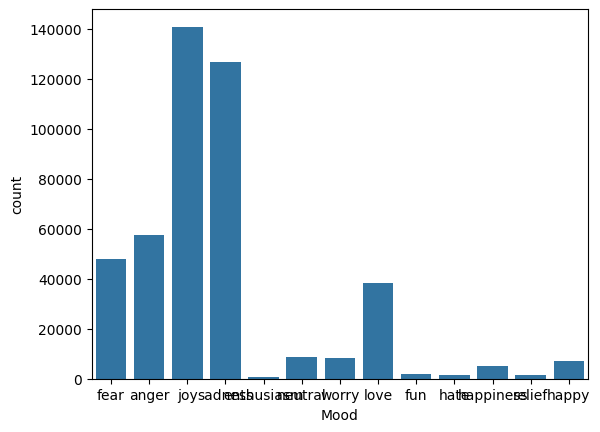

In [300]:
sns.countplot(x=df_total['Mood'])

In [301]:
df_total[df_total['Mood']=='relief'].head(50)

,Text,Mood
6078,I'm at work,relief
6139,"is done painting all the bedroom furniture, I ...",relief
6226,Scary lightning and thunder I'm glad it's ove...,relief
6289,is home. safely... but hungry,relief
6313,just finished 8 hours of Texas Life Insurance ...,relief
6324,"@AnthonyLucas @iainfunnell Yeah, physically mo...",relief
6423,Headin home...Refreshed my mind and soul justa...,relief
6513,@charlieboy808 thanks for the rt and sorry abo...,relief
6521,@kaseypoteet LOL yeah yeah you big perv ;) Was...,relief
6564,@nawid nope het is LOST&amp;found he ;-),relief


In [302]:
df[df["Text"] == "i didnt feel humiliated"]

,Text,Mood


In [303]:
df_total

,Text,Mood
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
464389,that was what i felt when i was finally accept...,joy
464390,i take every day as it comes i m just focussin...,fear
464391,i just suddenly feel that everything was fake,sadness
464392,im feeling more eager than ever to claw back w...,joy


In [304]:
df_total.to_csv(pwd + "\\data\\df_total.csv", index=False)

In [305]:
def random_sample(dataa, total, labell, state=None):
    mood_data= dataa[dataa['Mood']==labell]
    random_samplee = mood_data.sample(n=total, random_state=state)
    return random_samplee

In [306]:
mood_sadness = random_sample(df_total, total=1000, labell='sadness')
mood_sadness

,Text,Mood
26104,@emulley I missed you today...I know you must ...,sadness
229853,i feel vain and cocky,sadness
179052,i don t feel repressed,sadness
63437,i feel like i am going to get blamed,sadness
420604,i feel really vain and stupid taking photos of...,sadness
...,...,...
185650,i feel like i am a bad wife but most of all i ...,sadness
170977,im feeling lethargic and tired,sadness
113556,i feel myself becoming more and more like the ...,sadness
419111,i feel so stupid to hav let it out on fb,sadness
